In [ ]:
using FUSE
using Plots;
FUSE.logging(Logging.Info; actors=Logging.Info);

In [ ]:
ini, act= FUSE.case_parameters(:KDEMO)
display(ini.equilibrium)

In [ ]:
@show ini.oh.technology, ini.tf.technology, ini.pf_active.technology
# a note that this is ITER-like LTS

In [ ]:
dd_LTS = FUSE.init(ini, act);

In [ ]:
dd = deepcopy(dd_LTS)

act.ActorStabilityLimits.raise_on_breach = false
act.ActorHFSsizing.error_on_technology = false

FUSE.ActorWholeFacility(dd,act);

In [ ]:
# Make magnets HTS (ideally we get K-DEMO LTS magnet techonolgy parameters)
ini.oh.technology = :HTS
ini.tf.technology = :HTS
ini.pf_active.technology = :HTS

dd_HTS = FUSE.init(ini, act)
act.ActorPFcoilsOpt.do_plot = true

act.ActorHFSsizing.verbose = true

FUSE.ActorWholeFacility(dd_HTS,act);



In [ ]:
FUSE.digest(dd_HTS)

In [ ]:
# Core transport according to turbulent and neoclassical fluxes with EPED H-mode at the edge

act.ActorFluxMatcher.max_iterations = 300
act.ActorFluxMatcher.evolve_pedestal = true
act.ActorFluxMatcher.verbose = true
act.ActorTGLF.user_specified_model = "sat1_em_iter"
FUSE.ActorFluxMatcher(dd,act);



## K-DEMO with LTS (before update)


#### PF coil opt
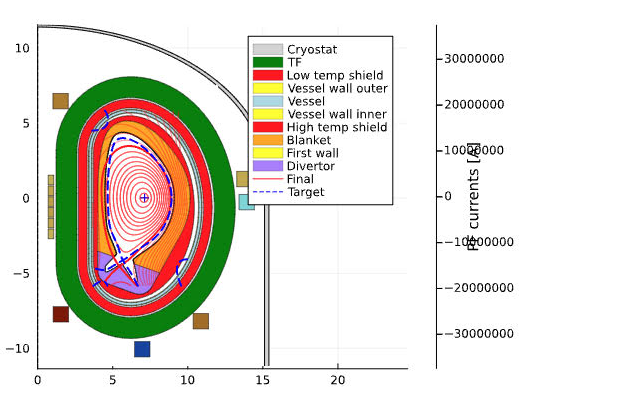

#### Stresses
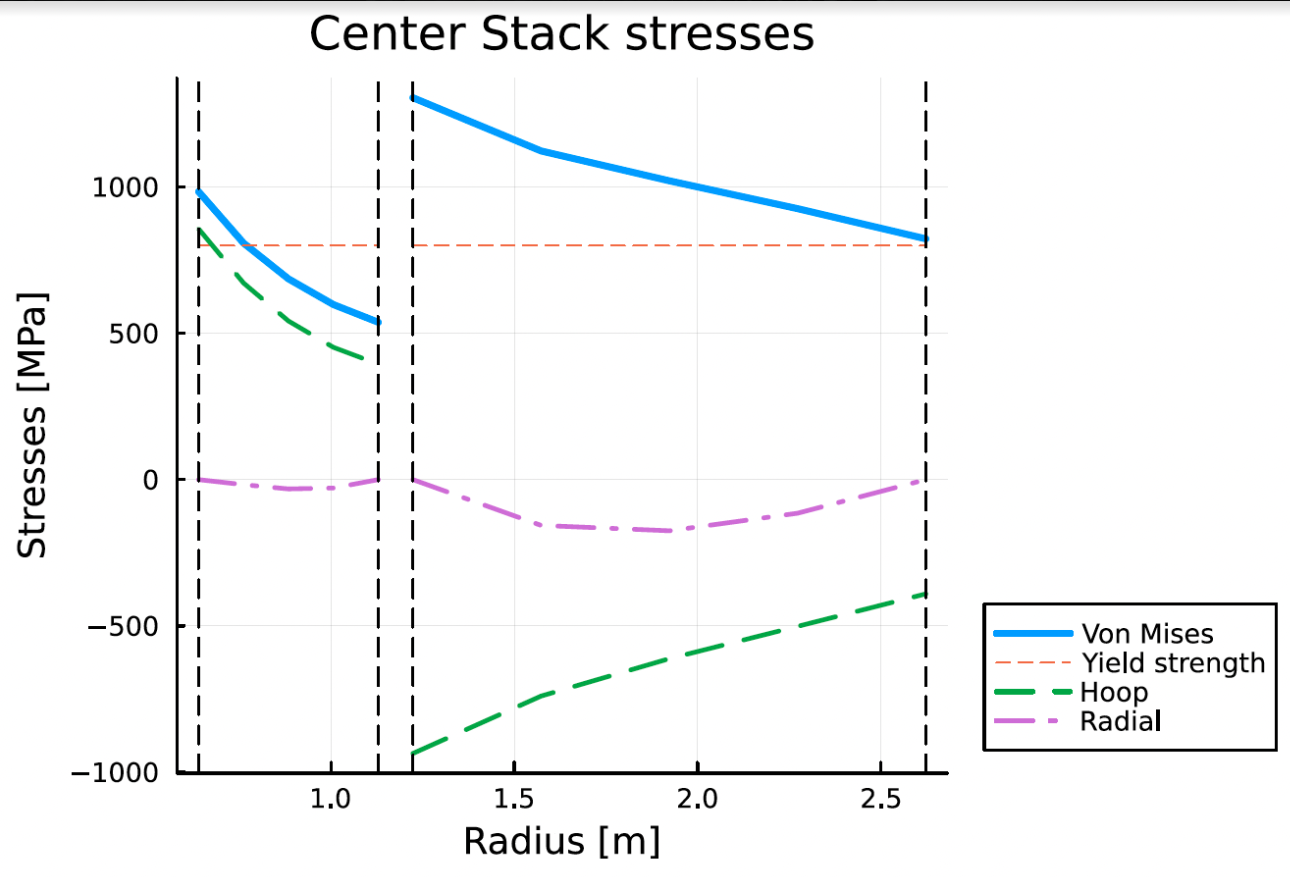

In [ ]:
dd = FUSE.init(ini,act);

## Flux matching

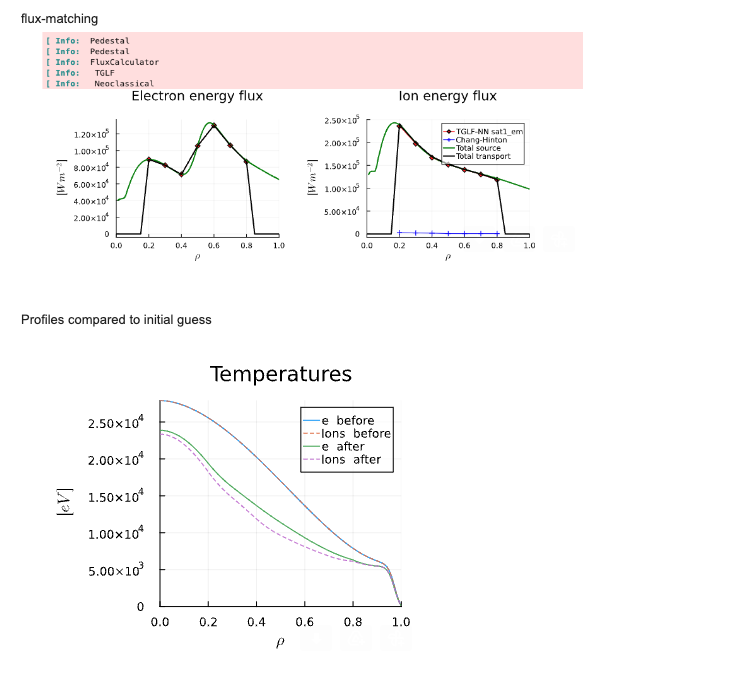

PF coil optimization with ITER like LTS coils

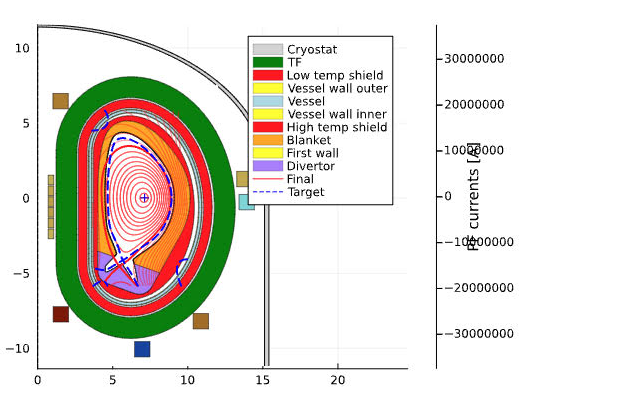

Stresses 
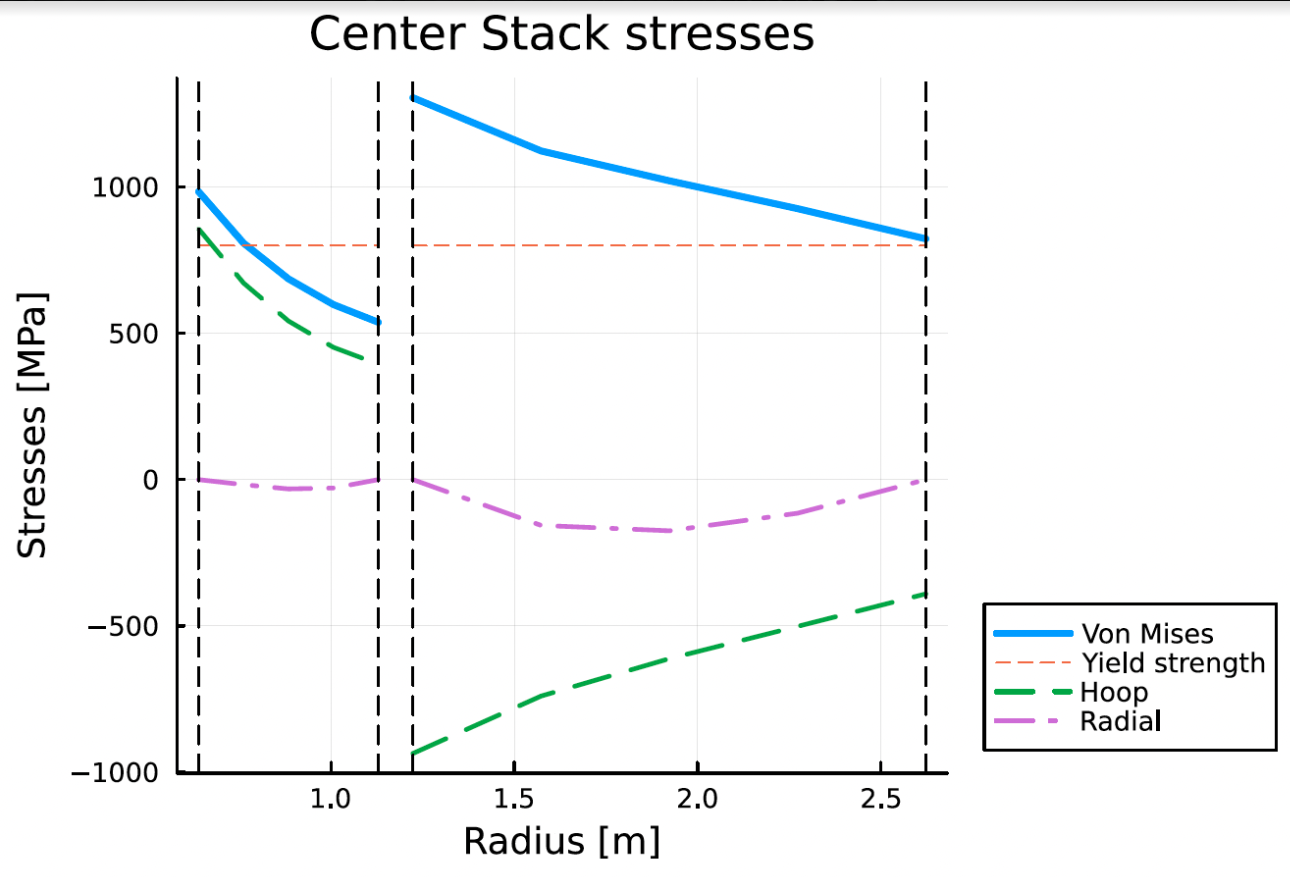


In [ ]:
FUSE.digest(dd_,"K DEMO using FUSE WholeFacility")
